In [1]:
import pandas as pd

In [4]:
train_df = pd.read_csv('train.csv', header = 0, sep = ',')
test_df = pd.read_csv('test.csv', header = 0, sep = ',')

In [6]:
train_df.head()

,src_ip,dst_ip,src_port,dst_port,first_pkt_time,last_pkt_time,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,...,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse,class
0,6003::1000,2000::100:502,8805,8805,1.603074e+09,1.603074e+09,190,78,16,16,...,0,0,0,0,0,0,0,0,0,0
1,6003::1003,2000::100:506,14597,14601,1.603074e+09,1.603074e+09,190,143,0,9,...,0,81,113,324,218,61,49,29,37,0
2,6003::1002,2000::100:504,8800,14606,1.603074e+09,1.603074e+09,190,286,0,3,...,0,46,53,220,519,81,31,26,178,0
3,6003::1005,2000::100:502,14597,14599,1.603074e+09,1.603074e+09,191,83,4,1,...,0,96,121,479,573,80,52,125,221,0
4,6003::1004,2000::100:504,14611,14615,1.603074e+09,1.603075e+09,190,79,4,6,...,0,120,107,437,527,34,2,137,2,0


In [7]:
test_df.head()

,src_ip,dst_ip,src_port,dst_port,first_pkt_time,last_pkt_time,avg_hops,avg_packet_len,nodeRelatedMessages:HeartbeatRequest,nodeRelatedMessages:HeartbeatResponse,...,nodeRelatedMessages:SessionSetDeletionResponse,sessionRelatedMessages:SessionEstablishmentRequest,sessionRelatedMessages:SessionEstablishmentResponse,sessionRelatedMessages:SessionModificationRequest,sessionRelatedMessages:SessionModificationResponse,sessionRelatedMessages:SessionDeletionRequest,sessionRelatedMessages:SessionDeletionResponse,sessionRelatedMessages:SessionReportRequest,sessionRelatedMessages:SessionReportResponse,class
0,73.196.231.158,227.56.30.141,1689,36756,1.603085e+09,1.603086e+09,190,160,13,8,...,0,224,59,1217,173,178,28,345,193,1
1,136.251.250.75,6003::fec,43958,56887,1.603083e+09,1.603083e+09,191,209,5,5,...,0,119,20,385,192,178,30,115,20,1
2,6003::1000,2000::100:501,14604,8805,1.603074e+09,1.603074e+09,190,251,0,0,...,0,124,124,667,667,83,83,4,0,0
3,6003::1002,2000::100:502,8803,8805,1.603074e+09,1.603074e+09,191,95,3,13,...,0,88,102,32,81,48,78,168,30,0
4,49.114.110.10,6003::101e,12767,22509,1.603084e+09,1.603084e+09,191,235,15,0,...,0,16,30,14,106,143,26,7,18,1


In [9]:
# учебник
# тренировочная выборка

X_train = train_df.iloc[:, 6:-1] # входные данные, "задачи"
Y_train = train_df.iloc[:, -1] # что мы пытаемся предсказать, "ответы" на "задачи"

In [12]:
# экзамен
# тестовая выборка

X_test = test_df.iloc[:, 6:-1]
Y_test = test_df.iloc[:, -1]

In [20]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
import matplotlib.pyplot as plt

In [16]:
KNNReg = KNeighborsClassifier()

In [17]:
KNNReg.fit(X_train, Y_train)

KNeighborsClassifier()

In [18]:
prediction = KNNReg.predict(X_test)

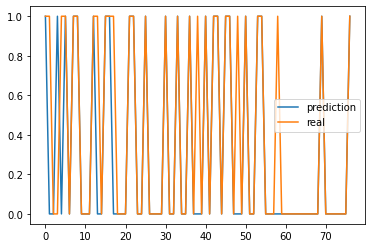

In [19]:
%matplotlib inline
plt.plot(prediction[:], label = 'prediction')
plt.plot(Y_test.iloc[:], label = 'real')
plt.legend()

In [28]:
from sklearn.model_selection import KFold, cross_val_score

In [27]:
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=7)
results = model_selection.cross_val_score(KNNReg, X_train, Y_train, cv=kfold, scoring=scoring)
print("Accuracy: {:.3f} ({:.3f})".format(results.mean(), results.std()))

Accuracy: 0.811 (0.079)


D:\Apps\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
